## CNN 모델
* Fashion MNIST 데이터셋을 이용한 이미지 분류
    * 패션 10개의 카테고리를 0~9 숫자로 구분

0 : 티셔츠/탑,  1:바지, 2: 스웨터, 3: 드레스 4: 코트 5: 샌달, 6: 셔츠, 7: 스니커즈 8: 가방, 9: 앵클 부츠

### Dataset Load

In [2]:
import numpy as np
from tensorflow.keras.datasets import fashion_mnist

#(28, 28) train : 60000개, test: 10000개 데이터 로드
(train_input, train_target), (test_input, test_target) = fashion_mnist.load_data()

#        인풋 데이터 갯수, 트레인 인풋 이미지 크기 확인
print(len(train_input), train_input.shape)          # 60000 (60000, 28, 28)
print(test_input[0].shape, len(test_input))         # (28, 28) 10000(길이)

# return_counts=True -> 중복 되지 않는 값이 몇 번 등장 하는지 빈도
print(np.unique(train_target, return_counts=True))
print(train_target[0])


4422102/4422102 [==============================] - 0s 0us/step
60000 (60000, 28, 28)
(28, 28) 10000
(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9], dtype=uint8), array([6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000, 6000],
      dtype=int64))
9


###  keras 패션 MVIST 훈련 데이터셋 이미지 출력

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0
    0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62
   54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134
  144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178
  107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216
  216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 23

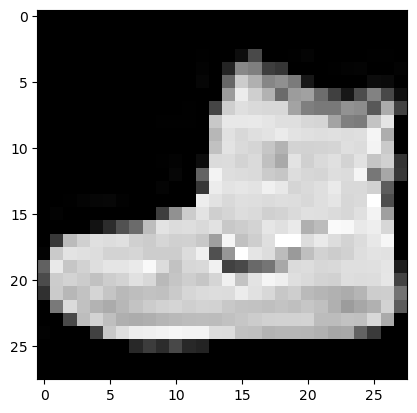

In [3]:
import matplotlib.pyplot as plt

print(train_input[0])
plt.imshow(train_input[0], cmap='gray') # 라벨이 9인 input 이미지 체크

plt.show()

In [4]:
np.set_printoptions(linewidth=np.inf)
print(train_input[0])

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   1   0   0  13  73   0   0   1   4   0   0   0   0   1   1   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3   0  36 136 127  62  54   0   0   0   1   3   4   0   0   3]
 [  0   0   0   0   0   0   0   0   0   0   0   0   6   0 102 204 176 134 144 123  23   0   0   0   0  12  10   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0 155 236 207 178 107 156 161 109  64  23  77 130  72  15]
 [  0   0   0   0   0   0   0   0   0   0   0   1   0  69 207 223 218 216 216 163 127 121 122 146 141  88 172  66]
 [  0   0   0   0   0   0   0   0   0   1   1   1   0 200 232 232 233 229 223 22

각 픽셀은 0-255 사이의 값을 가지는 것을 확인 할 수 있다.
* 검은색 0,
* 흰색은 255,
* 회색은 0-255 사이의 값

## CNN 모델 입력을 위한 데이터 Shape 형태 변환 및 정규화
- 케라스 합성 곱층 입력
  - 패션 mnist 이미지 3차원 변환 입력
- 케라스 합성곱 층은 항상 3차원 입력 기대(lows, cols, channels)
    - 28, 28 2차원 흑백 이미지를  28, 28, 1 3차원 배열로 변환해서 적용

1. 데이터 범위: 일반적으로 0부터 255까지의 범위를 가지는 이미지 데이터가 있습니다. 이는 8비트 컬러 채널로 표현되는 이미지 데이터에서 흔히 볼 수 있는 형태입니다. 이 범위는 각 픽셀의 색상 채널(빨강, 초록, 파랑)의 강도를 나타냅니다. 최솟값은 0(강도 없음)이고 최댓값은 255(최대 강도)입니다.

2. 정규화 범위: 데이터를 정규화할 때는 일반적으로 특정 범위 내로 값을 조정합니다. 일반적으로 데이터는 0과 1 또는 -1과 1 사이의 값으로 정규화됩니다. 0과 1 사이의 범위로 정규화하는 것은 많은 머신러닝 알고리즘에서 좋은 결과를 얻는 데 도움이 되며, 스케일의 차이로 인한 특정 특성이 우세해지는 것을 방지합니다.

**255로 나누는 이유:**

원래 데이터 범위가 0부터 255이므로 각 픽셀 값을 255로 나누면 0부터 1까지의 범위로 값을 조정할 수 있습니다.

예를 들어, 픽셀 값이 127일 경우 255로 나눈 값은 약 0.498이 됩니다. 이 정규화 과정은 픽셀 값 간의 상대적인 관계를 유지하면서 원하는 범위 내에 값을 조정합니다.
255로 나누는 것은 원래 데이터를 왜곡시키지 않고 정규화하는 간단한 선형 변환입니다. 데이터 세트 내의 값들의 비율을 유지합니다.
255로 나누면 많은 머신러닝 알고리즘에 적합한 범위로 데이터를 조정할 수 있습니다. 이 알고리즘들은 주로 [0, 1] 범위의 입력을 통해 더 나은 성능을 발휘합니다.
또한 255로 나누면 필요시 쉽게 역변환할 수 있습니다. 정규화된 데이터를 원래 스케일로 변환하려면 간단히 255를 곱하면 됩니다.

In [6]:
train_scaled = train_input.reshape(-1,28,28,1)  / 255.0     # 데이터 셋 정규화
print(train_scaled.shape)

(60000, 28, 28, 1)


## 훈련 데이터 셋 => 훈련 / 검증 데이터셋으로 분할

In [8]:
from sklearn.model_selection import train_test_split

# 훈련 세트와 검증 세트로 분할
# 60000개 샘플 데이터를 20% 비율로 훈련 / 검증 데이터 셋으로 분할
train_scaled, val_scaled, train_target, val_target = train_test_split(train_scaled, test_target, test_size=0.2, random_state=42)

print(len(train_scaled))
# print(len(val_scaled))



60000
